## **Handwritten Digit Recognition with Neural Network**

In this machine learning project, we will recognize handwritten digits, i.e, numbers from 0-9. This we are going to achieve by modeling a neural network that will have to be trained over a dataset containing images of numbers.

### **What is Handwritten Digit Recognition?**

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
import seaborn as sns

### **Importing the dataset**

The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
y_train = Y_train
y_test = Y_test

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### **Data Preprocessing**

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [3]:
# Converting a into a 3D model, We are using 1 as the images are in B/W
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

# Rescaling
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **Data Visualization**

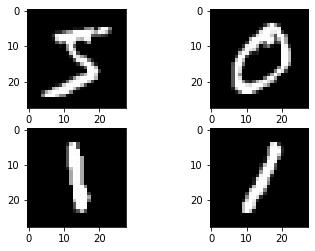

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[200], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[345], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

C:\Users\vedaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


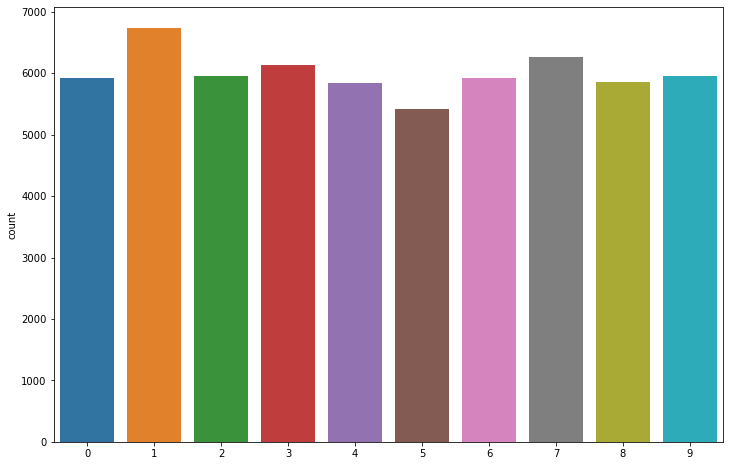

In [5]:
plt.figure(figsize = (12, 8))
sns.countplot(y_train)
plt.show()

C:\Users\vedaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


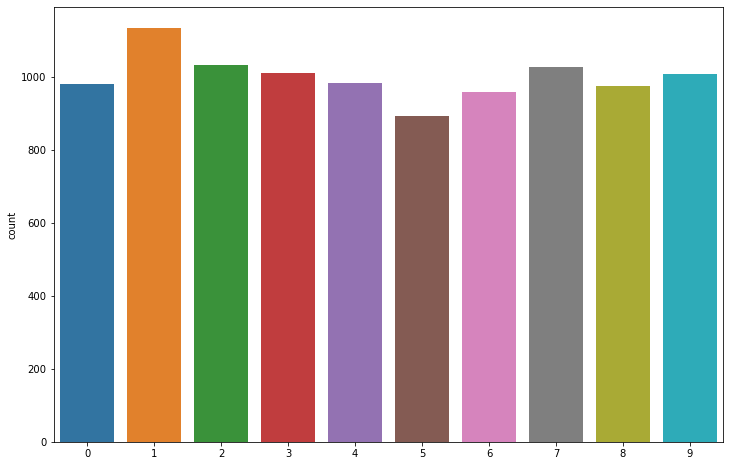

In [6]:
plt.figure(figsize = (12, 8))
sns.countplot(y_test)
plt.show()

### **Creating the CNN Model**

Now we will create our CNN model in Python data science project. A CNN model generally consists of convolutional and pooling layers. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adam optimizer.

In [8]:
model = Sequential()
model.add(Convolution2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9438208   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

In [11]:
hist = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_data = (X_test, Y_test))
print("The Model was successfully trained")

model.save('mnist_digit_recognition.h5')
print("Saving the model as mnist_digit_recognition.h5")

Epoch 1/10
469/469 [==============================] - 162s 346ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0349 - val_accuracy: 0.9910
Epoch 2/10
469/469 [==============================] - 167s 357ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 3/10
469/469 [==============================] - 167s 355ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0350 - val_accuracy: 0.9909
Epoch 4/10
469/469 [==============================] - 166s 355ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0324 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 166s 353ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0390 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 166s 355ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0398 - val_accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 173s 369ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0339 -

### **Model Evaluation**

In [12]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

313/313 [==============================] - 6s 20ms/step - loss: 0.0448 - accuracy: 0.9908
Test loss: 0.044785477221012115
Test accuracy: 99.08000230789185


The number predicted is :  9


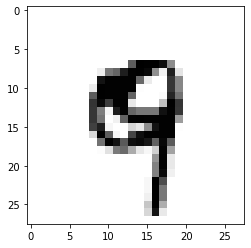

In [13]:
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print('The number predicted is : ', pred.argmax())

### **Visulaization of the Results**

In [14]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


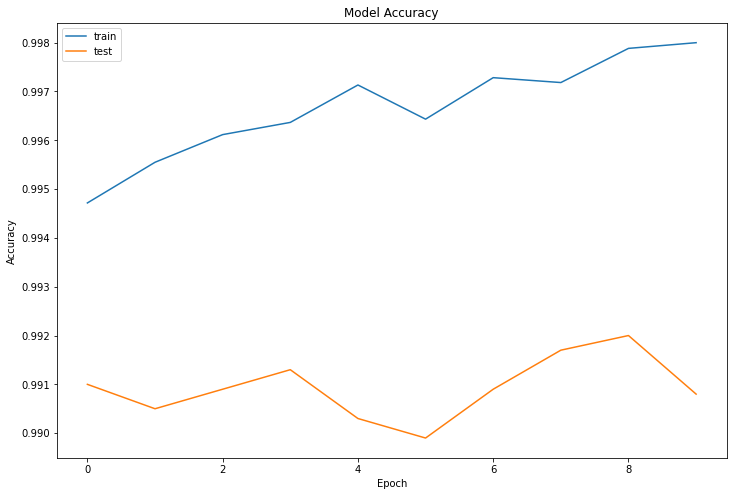

In [15]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

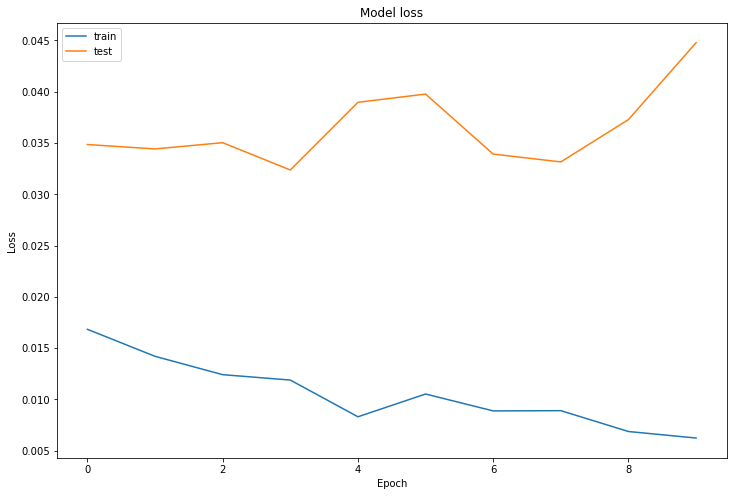

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **GUI to predict digits**

In [17]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
import os
import cv2
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist_digit_recognition.h5')
print('Trained weights loaded')

def get_handle():
    """This function uses the wingui library to get the window handles of all the active windows. 
    Then, the window with the name as 'tk' is selected and its handle is returned."""
    toplist = []
    windows_list = []
    canvas = 0
    def enum_win(hwnd, result):
        win_text = win32gui.GetWindowText(hwnd)
        #print(hwnd, win_text)
        windows_list.append((hwnd, win_text))
    win32gui.EnumWindows(enum_win, toplist)
    for (hwnd, win_text) in windows_list:
        if 'tk' == win_text:
            canvas = hwnd
    return canvas

def preprocessing_image():
    """function to preprocess the image to"""
    image = cv2.imread('test.jpg')
    #print(type(image))
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    # cv2.imshow('binarized image', thresh)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(type(contours[0]))
    # print(len(contours[0]))
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
    #cv2.imshow('Contours', image) 
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)        
        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]        
        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))        
        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)        
        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digit = (padded_digit)
    return preprocessed_digit

def predict_digit(img):
    """function to predict the digit. 
    Argument of function is PIL Image"""
    img.save('test.jpg')
    preprocessed_image = preprocessing_image()
    # print(type(preprocessed_image))
    # print(preprocessed_image.shape)
    img = preprocessed_image.reshape(1, 28, 28, 1)
    img = img/255.0
    #predicting the digit
    result = model.predict([img])[0]
    os.remove('test.jpg')
    return np.argmax(result), max(result)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        hwnd = get_handle()
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        x1, y1, x2, y2 = rect
        # print(x1,x2, y1,y2)
        im = ImageGrab.grab((x1+40, y1+40, x2+100, y2+100))
        digit, acc = predict_digit(im)
        print(digit)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

Trained weights loaded
2
3
6
7
7
7
9
8
1
7
7
3
5
4
4
8
8
2
1
3
8
1
0
9
5
5
5
5
5
5
0
5
5
4
3
1
4
0
8
3
9
